

# Clustering


Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Clustering analysis can be done on the basis of features where we try to find subgroups of samples based on features or on the basis of samples where we try to find subgroups of features based on samples. We’ll cover here clustering based on features. Clustering is used in market segmentation; where we try to fined customers that are similar to each other whether in terms of behaviors or attributes, image segmentation/compression; where we try to group similar regions together, document clustering based on topics, etc.

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups

Machine learning comes in handy for this task. Particularly, clustering, the most important unsupervised learning problem, is able to create categories grouping similar individuals.
These categories are called clusters. A cluster is a collection of points in a dataset. These points are more similar between them than they are to points belonging to other clusters.
Distance-based clustering groups the points into some number of clusters such that distances within the cluster should be small while distances between clusters should be large.

# Kmeans Algorithm

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way kmeans algorithm works is as follows:

    Specify number of clusters K.
    Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
    Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

    Compute the sum of the squared distance between data points and all centroids.
    Assign each data point to the closest cluster (centroid).
    Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.
    
    
Kmeans algorithm is very popular and used in a variety of applications such as market segmentation, document clustering, image segmentation and image compression, etc. The goal usually when we undergo a cluster analysis is either:

- Get a meaningful intuition of the structure of the data we’re dealing with.
- Cluster-then-predict where different models will be built for different subgroups if we believe there is a wide variation in the behaviors of different subgroups. 

# Customer Segmentation

You will be applying K means clustering to classify the segements of the customers.

You are the owner of a shop. It doesn't matter if you own an e-commerce or a  supermarket. It doesn't matter if it is a small shop or a huge company such as Amazon or Netflix, it's better to know your customers.

You were able to collect basic data about your customers holding a membership card such as Customer ID, age, gender, annual income, and spending score. This last one is a score based on customer behavior and purchasing data.
There are some new products on the market that you are interested in selling. But you want to target a specific type of clients for each one of the products.  


# Import modules required

First of all, we need to import the required modules. 

In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

For this particular project, we'll work with two `scikit-learn` modules: `Kmeans` and `PCA`. They will allow us to perform a clustering algorithm and dimensionality reduction.

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
import seaborn as sns
%matplotlib inline

In [7]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

# Read data into a DataFrame

We read the basic data stored in the `[customers.csv]` file into a `DataFrame` using pandas. 

In [8]:
customers = pd.read_csv("customers.csv")

We check the first five rows of the DataFrame. 

In [9]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


`Interpretation`: We can see that we have: CustumerID, Gender, Age, Annual Income expressed as price x1000, and the spending score as we expected.

# Exploring the data

Now, it's time to explore the data to check the quality of the data and the distribution of the variables.

First, we check that if there is any missing value in the dataset. K-means algorithm is not able to deal with missing values. 

In [10]:
print(f"Missing values in each variable: \n{customers.isnull().sum()}")

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


`Interpretation`: Fortunately, there is no missing data.


We can also check if there are duplicated rows.

In [11]:
print(f"Duplicated rows: {customers.duplicated().sum()}")

Duplicated rows: 0


`Interpretation`: Our data is completely clean 

`Story`

Finally, we check how each variable is presented in the DataFrame. Categorical variables cannot be handled directly. K-means is based on distances. The approach for converting those variables depend on the type of categorical variables. 

In [12]:
print(f"Variable:                  Type: \n{customers.dtypes}") 

Variable:                  Type: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object




`Story`

Now, we can start observing the distribution of the variables. Here, we'll define two functions. The first one will retrieve descriptive statistics of the variables. The second one will help us graph the variable distribution.

# Descriptive statistics and Distribution.

`How?`

For the descriptive statistics, we'll get mean, standard deviation, median and variance. If the variable is not numeric, we'll get the counts in each category.

We are making this function so that we have all the data description as one.
Alternatively, we can also use `DataFrame.describe()` to describe the entire dataframe at once.

In [12]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

`Interpretation`: We have defined this function where we calculate the basic statistical measures for all the integer and float type columns.


`Story:`

Now, you define a function to plot the histogram as well as statistical tables for different features.
You will proceed as per the comments on the code.

In [13]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

`Interpretation`: Once this function is made, we can now start by analysing the features.

We'll start by the **Spending Score**.

In [14]:
spending = customers["Spending Score (1-100)"]

In [15]:
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


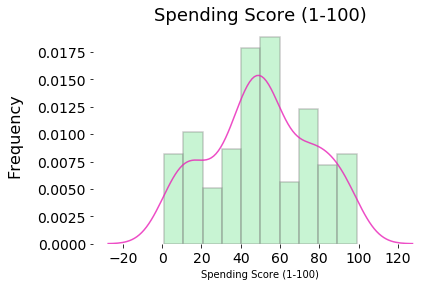

In [16]:
graph_histo(spending)

`Interpretation`: We see that the average spending score is betweem 40-60 for most of the people.

Then, we'll check **Age**.

In [17]:
age = customers["Age"]

In [18]:
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


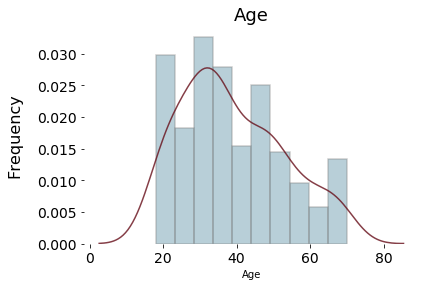

In [19]:
graph_histo(age)

`Interpretation`: The average age is around 40, as percieved from the stats table and graph

Finally, we'll explore **Annual Income** variable.

In [20]:
income = customers["Annual Income (k$)"]

In [21]:
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


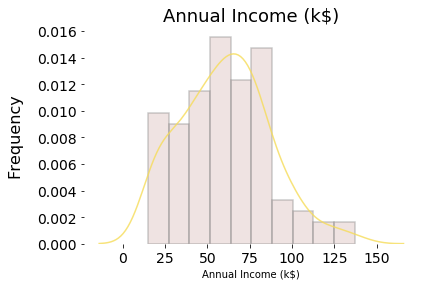

In [22]:
graph_histo(income)

`Interpretation`: The average income is around $60,000

In [24]:
gender = customers["Gender"]

In [25]:
statistics(gender)

,Gender
Female,112
Male,88


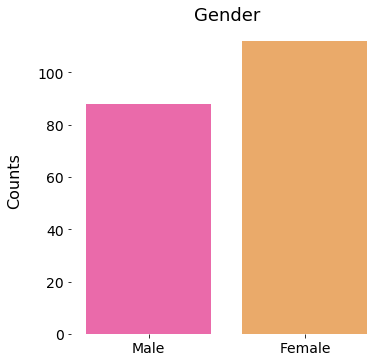

In [26]:
graph_histo(gender)

`Interpretation`: There are more female online consumers than men

# Correlation between parameteres

`How?`

Also, we will analyze the correlation between the numeric parameters. For that aim, we'll use the `pairplot` seaborn function. We want to see whether there is a difference between gender. So, we are going to set the `hue` parameter to get different colors for points belonging to female or customers.

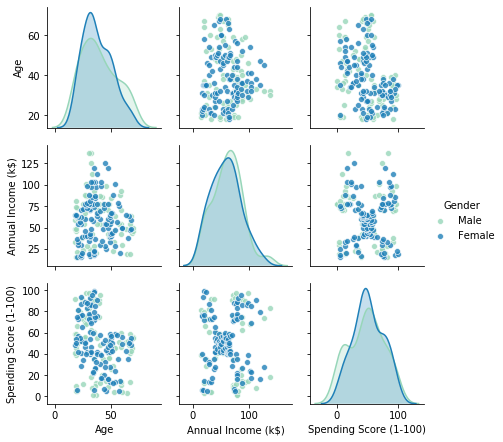

In [23]:
sns.pairplot(customers, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

`Interpretation`: You might wonder, Why is it important to look into the descriptive statistics, distribution and correlation between variables?

`Story`

In order to apply K-means, we need to meet the algorithm assumptions. 
  
K-means assumes:

- **Cluster's shape**: The variance of the distribution is spherical meaning that clusters have a spherical shape. In order for this to be true, all variables should be normally distributed and have the same variance.
- **Clusters' Size**: All clusters have the same number of observations.
- **Relationship between variables**: There is little or no correlation between the variables.

In our dataset, our variables are normally distributed. Variances are quite close to each other. Except for age that has a lower variance that the rest of the variables.
We could find a proper transformation to solve this issue. We could apply the logarithm or Box-Cox transformation. 
Box-Cox is a family of transformations which allows us to correct non-normal distributed variables or non-equal variances.

# Dimensionality reduction

After we checked that we can apply k-means, we can apply Principal Component Analysis (PCA) to discover which dimensions best maximize the variance of features involved.

## Principal Component Analysis (PCA)

First, we'll transform the categorical variable into two binary variables.

In [24]:
customers["Male"] = customers.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [25]:
customers["Female"] = customers.Gender.apply(lambda x: 0 if x == "Female" else 1)

Then, we are going to select from the dataset all the useful columns. Customer ID is not a useful feature. Gender will split it into two binaries categories. It should not appear in the final dataset

In [26]:
X = customers.iloc[:, 2:]

In [27]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In order to apply PCA, we are going to use the `PCA` function from sklearn module.

In [28]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

During the fitting process, the model learns some quantities from the data: the "components" and "explained variance".

In [29]:
print(pca.components_)

[[-1.88980385e-01  5.88604475e-01  7.86022241e-01  3.32880772e-04
  -3.32880772e-04]
 [ 1.30957602e-01  8.08400899e-01 -5.73875514e-01 -1.57927017e-03
   1.57927017e-03]]


In [30]:
print(pca.explained_variance_)

[700.26450987 684.33354753]


`Interpretation`: These numbers that appear to be abstract define vectors. The components define the direction of the vector while the explained variance define the squared-length of the vector.

The vectors represent the principal axes of the data. The length of the vector indicates the importance of that axis in describing the distribution of the data. The projection of each data point onto the principal axes are the principal components of the data.

In [31]:
# Transform samples using the PCA fit
pca_2d = pca.transform(X)

# Bi-Plot

We can represent this using a type of scatter plot called `biplot`. Each point is represented by its score regarding the principal components.
It is helpful to understand the reduced dimensions of the data. It also helps us discover relationships between the principal components and the original variables.

Principal component analysis (PCA) is an important tool for understanding relationships in continuous multivariate data. When the first two principal components (PCs) explain a significant portion of the variance in the data, you can visualize the data by projecting the observations onto the span of the first two PCs. In a PCA, this plot is known as a score plot. You can also project the variable vectors onto the span of the PCs, which is known as a loadings plot. See the article "How to interpret graphs in a principal component analysis" for a discussion of the score plot and the loadings plot.

A biplot overlays a score plot and a loadings plot in a single graph. An example is shown at the right. Points are the projected observations; vectors are the projected variables. If the data are well-approximated by the first two principal components, a biplot enables you to visualize high-dimensional data by using a two-dimensional graph.

In general, the score plot and the loadings plot will have different scales. Consequently, you need to rescale the vectors or observations (or both) when you overlay the score and loadings plots. There are four common choices of scaling. Each scaling emphasizes certain geometric relationships between pairs of observations (such as distances), between pairs of variables (such as angles), or between observations and variables. This article discusses the geometry behind two-dimensional biplots and shows how biplots enable you to understand relationships in multivariate data. 



In [32]:
# Biplot
import matplotlib.pyplot as plt
import numpy as np

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, color="#c7e9c0", edgecolor="#006d2c", alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='#253494',alpha=0.5,lw=2) 
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color="#000000", ha="center", va="center")
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color="#000000", ha="center", va="center")
    plt.xlim(-.75,1)
    plt.ylim(-0.5,1)
    plt.grid(False)
    plt.xticks(np.arange(0, 1, 0.5), size=12)
    plt.yticks(np.arange(-0.75, 1, 0.5), size=12)
    plt.xlabel("Component 1", size=14)
    plt.ylabel("Component 2", size=14)
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);  
 

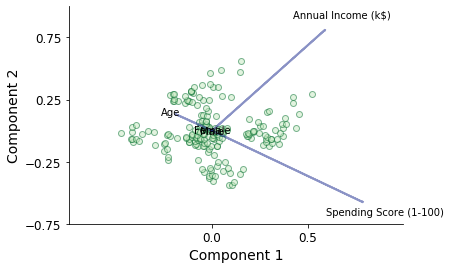

In [33]:
biplot(pca_2d[:,0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)

`Interpretation`: We can observe that Annual Income as well as Spending Score at the two most important components.

# K-means clustering 

`Story`

Time for clustering!

In order to cluster data, we need to determine how to tell if two data points are similar. A proximity measure characterizes the similarity or dissimilarity that exists between objects.
  
We can choose to determine if two points are similar. So if the value is large, the points are very similar.
Or choose to determine if they are dissimilar. If the value is small, the points are similar. This is what we know as "distance".
  
There are various distances that a clustering algorithm can use: Manhattan distance, Minkowski distance, Euclidean distance, among others.

${\sqrt{\sum_{i=1}^n (x_i-y_i)^2}}$

K-means typically uses `Euclidean distance` to determine how similar (or dissimilar) two points are.

`First, we need to fix the numbers of clusters to use. `

There are several direct methods to perform this. Among them, we find the elbow and silhouette methods.

We'll consider the total intra-cluster variation (or total within-cluster sum of square (WSS)). The goal is to minimize WSS.

Contrary to supervised learning where we have the ground truth to evaluate the model’s performance, clustering analysis doesn’t have a solid evaluation metric that we can use to evaluate the outcome of different clustering algorithms. Moreover, since kmeans requires k as an input and doesn’t learn it from data, there is no right answer in terms of the number of clusters that we should have in any problem. Sometimes domain knowledge and intuition may help but usually that is not the case. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling.

We’ll cover two metrics that may give us some intuition about k:

    Elbow method
    Silhouette analysis

`Elbow Method`

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

The Elbow method looks at how the total WSS varies with the number of clusters. 
For that, we'll compute k-means for a range of different values of k. Then, we calculate the total WSS. We plot the curve WSS vs. number of clusters. 
Finally, we locate the elbow or bend of the plot. This point is considered to be the appropriate number of clusters.

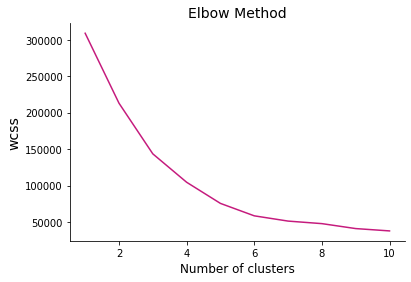

In [34]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

`Story`

How does k-means clustering works? The main idea is to select k centers, one for each cluster. There are several ways to initialize those centers. We can do it randomly, pass certain points that we believe are the center or place them in a smart way (e.g. as far away from each other as possible).
Then, we calculate the Euclidean distance between each point and the cluster centers. We assign the points to the cluster center where the distance is minimum.
After that, we recalculate the new cluster center. We select the point that is in the middle of each cluster as the new center. 
And we start again, calculate distance, assign to cluster, calculate new centers. When do we stop? When the centers do not move anymore.

In [35]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X)

Now, let's check how our clusters look like:

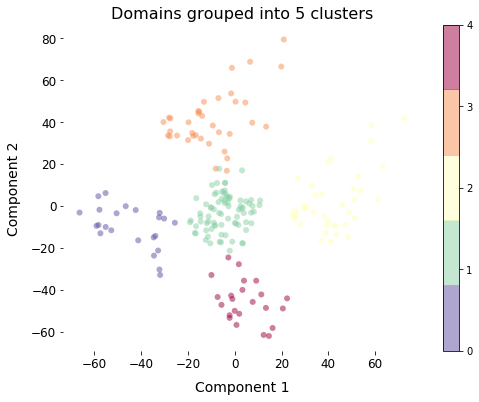

In [36]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Domains grouped into 5 clusters', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()

Now, we store this info into a dataframe

In [37]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Male", "Female"])

In [38]:
centroids.index_name = "ClusterID"

In [39]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [40]:
centroids

,Age,Annual Income,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0.391304,0
1,43.088608,55.291139,49.569620,0.582278,0.417722,1
2,32.692308,86.538462,82.128205,0.538462,0.461538,2
3,40.666667,87.750000,17.583333,0.472222,0.527778,3
4,25.521739,26.304348,78.565217,0.608696,0.391304,4


`Interpretation`: The most important features appear to be Annual Income and Spending score. 
We have people whose income is low but spend in the same range - segment 0. People whose earnings a high and spend a lot - segment 1. Customers whose income is middle range but also spend at the same level - segment 2. 
Then we have customers whose income is very high but they have most spendings - segment 4. And last, people whose earnings are little but they spend a lot- segment 5.

Imagine that tomorrow we have a new member. And we want to know which segment that person belongs. We can predict this.

In [52]:
X_new = np.array([[43, 76, 56, 0, 1]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 1
